# Visualizing the mouse behavior (Opto Trials)

In [1]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [2]:
data = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/0.1opto_trials_9010_high.csv',index_col=0)

In [3]:
data.head(10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Laser
0,PV30,07122017_PV30,11.0,11.0,2.0,1.0,-1.0,0.477,0.0,0.0,...,0.0,0.0,1.620,0.590,3.327,1.0,1.0,1.0,1.0,0.0
1,PV30,07122017_PV30,12.0,12.0,3.0,1.0,1.0,0.552,0.0,0.0,...,1.0,1.0,3.327,0.477,1.536,0.0,1.0,0.0,0.0,0.0
2,PV30,07122017_PV30,13.0,13.0,3.0,1.0,-1.0,0.428,0.0,0.0,...,0.0,0.0,1.536,0.552,2.550,1.0,1.0,1.0,1.0,0.0
3,PV30,07122017_PV30,14.0,14.0,4.0,1.0,1.0,0.444,0.0,0.0,...,1.0,1.0,2.550,0.428,1.665,0.0,1.0,0.0,0.0,0.0
4,PV30,07122017_PV30,15.0,15.0,4.0,1.0,-1.0,0.559,0.0,0.0,...,0.0,0.0,1.665,0.444,1.388,0.0,0.0,0.0,1.0,0.0
5,PV30,07122017_PV30,16.0,16.0,5.0,2.0,1.0,1.070,0.0,1.0,...,0.0,1.0,1.388,0.559,3.333,1.0,1.0,1.0,1.0,0.0
6,PV30,07122017_PV30,17.0,17.0,6.0,1.0,2.0,0.490,0.0,0.0,...,1.0,1.0,3.333,1.070,1.205,0.0,1.0,0.0,0.0,0.0
7,PV30,07122017_PV30,18.0,18.0,6.0,1.0,-1.0,0.516,0.0,0.0,...,0.0,0.0,1.205,0.490,1.320,0.0,0.0,0.0,0.0,0.0
8,PV30,07122017_PV30,19.0,19.0,6.0,2.0,-2.0,0.543,1.0,1.0,...,0.0,0.0,1.320,0.516,1.870,0.0,0.0,0.0,0.0,0.0
9,PV30,07122017_PV30,20.0,20.0,6.0,3.0,-3.0,0.385,0.0,0.0,...,0.0,0.0,1.870,0.543,1.191,0.0,0.0,0.0,1.0,0.0


In [4]:
data.shape


(9858, 54)

In [5]:
np.unique(data['Reward Streak'])

array([-25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.])

In [6]:
data[data['Reward Streak'] == -1]['Switch'].mean()

0.24091627172195892

In [7]:
data['Laser'].mean()

0.10093325218096977

## separate back into individual mice for mouse to mouse comparison

In [8]:
np.unique(data['Mouse ID'])

array(['PV30', 'SOM41', 'SOM42', 'SOM44', 'SOM45'], dtype=object)

In [9]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']
#data_PV30 = data[data['Mouse ID'] == 'PV30']

datas = []

for s in np.unique(data['Session ID'].values):
    #datas.append(data_PV30[data_PV30['Session ID'] == s])
    datas.append(data_SOM42[data_SOM42['Session ID'] == s])
    datas.append(data_SOM44[data_SOM44['Session ID'] == s])
    datas.append(data_SOM45[data_SOM45['Session ID'] == s])
    datas.append(data_SOM41[data_SOM41['Session ID'] == s])

In [10]:
data_SOM42.shape, data_SOM44.shape, data_SOM45.shape, data_SOM41.shape

((2062, 54), (2023, 54), (3187, 54), (1991, 54))

# p(switch) | switched in ith previous trial

In [143]:
p_switch = np.zeros(20)
for i in np.arange(0,20):
    p_switch[i] = data.iloc[np.where(data['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [144]:
p_switchy = np.zeros((len(datas),20))

for s,d in enumerate(datas):
    for i in np.arange(0,20):
        p_switchy[s,i] = d.iloc[np.where(d['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [145]:
errors = p_switchy.std(axis=0) / np.sqrt(len(p_switchy))

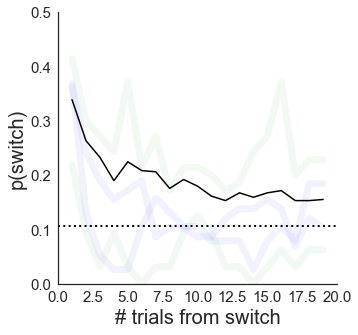

In [146]:
sns.set_style('white')
plt.figure(figsize=(5,5))
for s in range(20):
    if (s%2 == 0):
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='blue')
    else:
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='green')
        
plt.hlines(y=data['Switch'].mean(axis=0),xmin=0,xmax=20,color='black',alpha=1,linewidth=2,linestyles='dotted',label='average')
plt.plot(np.arange(1,20),p_switch[1:],color='black',linewidth=1.5)
plt.fill_between(np.arange(1,20),p_switch[1:]+errors[1:],p_switch[1:]-errors[1:],color='grey')
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.xlabel('# trials from switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

## Analysis of block switches

In [11]:
data.shape

(9858, 54)

In [11]:
t_block_unique = np.unique(data['Block Trial'].values)
p_switch_block = np.zeros((t_block_unique.shape[0],2))
high_p_port = np.zeros_like(p_switch_block)
trial_block_count = np.zeros_like(t_block_unique)

for t in t_block_unique:
    p_switch_block[int(t),0] = data[data['Block Trial'] == t]['Switch'].mean(axis=0)
    trial_block_count[int(t)] = data[data['Block Trial'] == t].shape[0]
    p_switch_block[int(t),1] = data[data['Block Trial'] == t]['Switch'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    
    high_p_port[int(t),0] = data[data['Block Trial']==t]['Higher p port'].mean(axis=0)
    high_p_port[int(t),1] = data[data['Block Trial']==t]['Higher p port'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    

total # of blocks in dataset: ~139


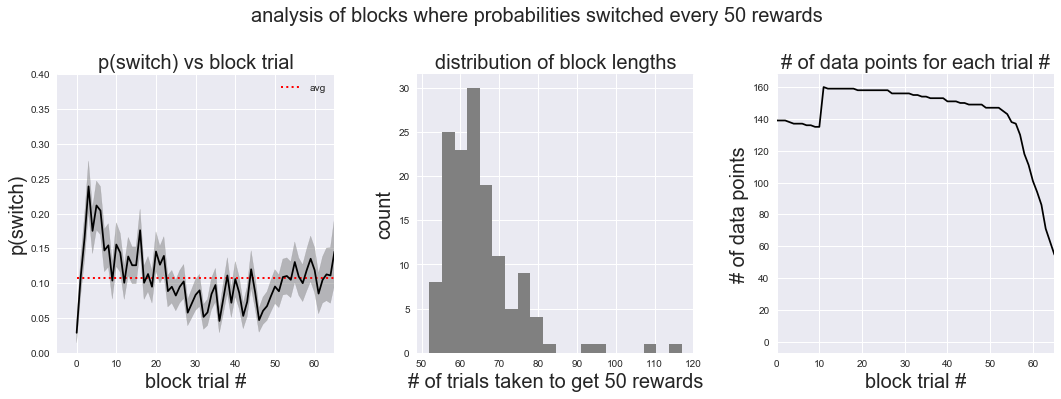

In [12]:
x_end=65
plt.figure(figsize=(15,5))
plt.suptitle('analysis of blocks where probabilities switched every 50 rewards',x=0.5,y=1.1,fontsize=20)

plt.subplot(131)
plt.plot(t_block_unique,p_switch_block[:,0],color='black')
plt.fill_between(t_block_unique,p_switch_block[:,0]+p_switch_block[:,1],p_switch_block[:,0]-p_switch_block[:,1],color='grey',alpha=0.5)
plt.hlines(data['Switch'].mean(axis=0),xmin=0,xmax=x_end,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlim(-5,x_end)
plt.ylim(0,0.4)
plt.xlabel('block trial #',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) vs block trial',fontsize=20)

plt.subplot(132)
plt.hist(data.iloc[np.where(data['Block Trial']==0)[0]-1]['Block Trial'],bins=20,color='grey')
plt.title('distribution of block lengths',fontsize=20)
plt.xlabel('# of trials taken to get 50 rewards',fontsize=20)
plt.ylabel('count',fontsize=20)

plt.subplot(133)
plt.plot(t_block_unique,trial_block_count,color='black')
plt.title('# of data points for each trial #',fontsize=20)
plt.ylabel('# of data points',fontsize=20)
plt.xlabel('block trial #',fontsize=20)
plt.xlim(0,x_end)

plt.tight_layout()
print('total # of blocks in dataset: ~%.0f' % (np.sum(data['Block Trial']==0)))

In [13]:
data.index = np.arange(data.shape[0])

In [14]:
switch_points = data[data['Block Trial'] == 0 ].index.values

L = 15
paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
paraswitch_port = np.zeros_like(paraswitch)

for i,point in enumerate(switch_points):

    paraswitch[i,:] = data.iloc[point-L:point+L+10]['Switch']
    paraswitch_port[i,:] = data.iloc[point-L:point+L+10]['Higher p port']
# if final block ends before 40 trials will show error "could not broadcast input array from shape (26) into shape (40)"

ValueError: could not broadcast input array from shape (22) into shape (40)

total # of blocks in dataset: ~139


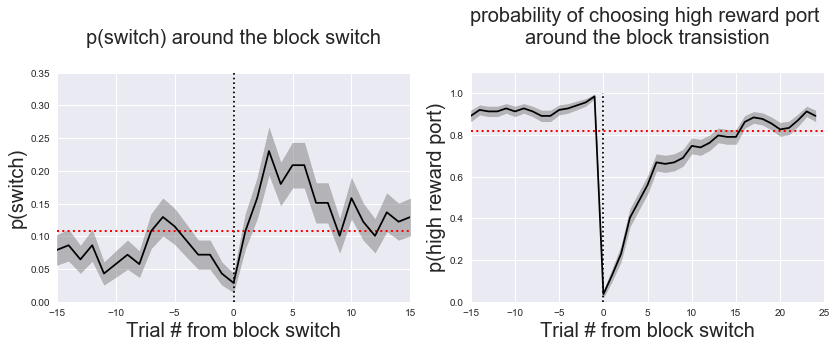

In [15]:
u = paraswitch.mean(axis=0)
s = paraswitch.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the block switch',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.35)

plt.subplot(122)
u = paraswitch_port.mean(axis=0)
s = paraswitch_port.std(axis=0)
SE = s/np.sqrt(paraswitch_port.shape[0])
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('probability of choosing high reward port \naround the block transistion',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L+10)
plt.ylim(0,1.1)

plt.tight_layout()
print('total # of blocks in dataset: ~%.0f' % (np.sum(data['Block Trial']==0)))

## look at individual mice

In [16]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
#data_PV30 = data[data['Mouse ID'] == 'PV30']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']


In [17]:
mice = [data_SOM44, data_SOM42, data_SOM41]

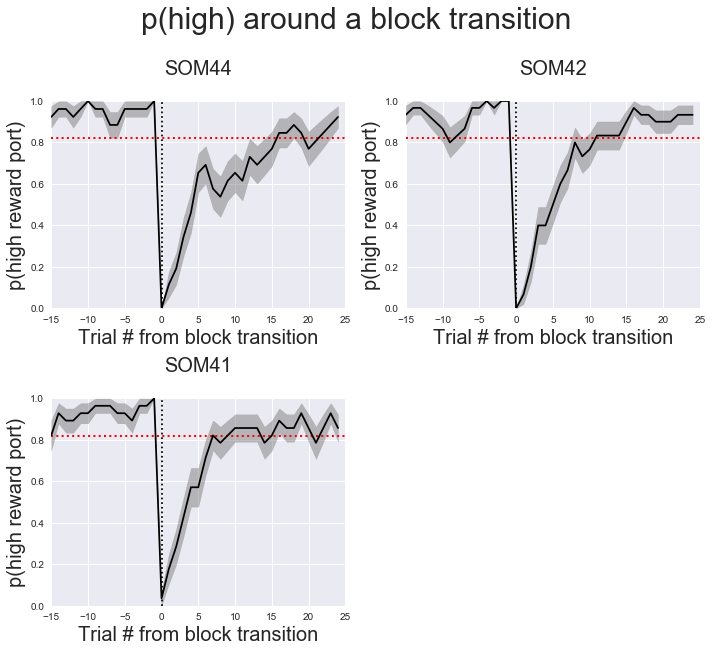

In [18]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(high) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Higher p port'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
    plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block transition',fontsize=20)
    plt.ylabel('p(high reward port)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0], fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L+10)
    plt.ylim(0,1)
        
plt.tight_layout()

In [22]:
 data_SOM42.shape, data_SOM44.shape, data_SOM45.shape, data_SOM41.shape

((2062, 54), (2023, 54), (3187, 54), (1991, 54))

In [23]:
data['Switch'].mean()

0.10813552444714952

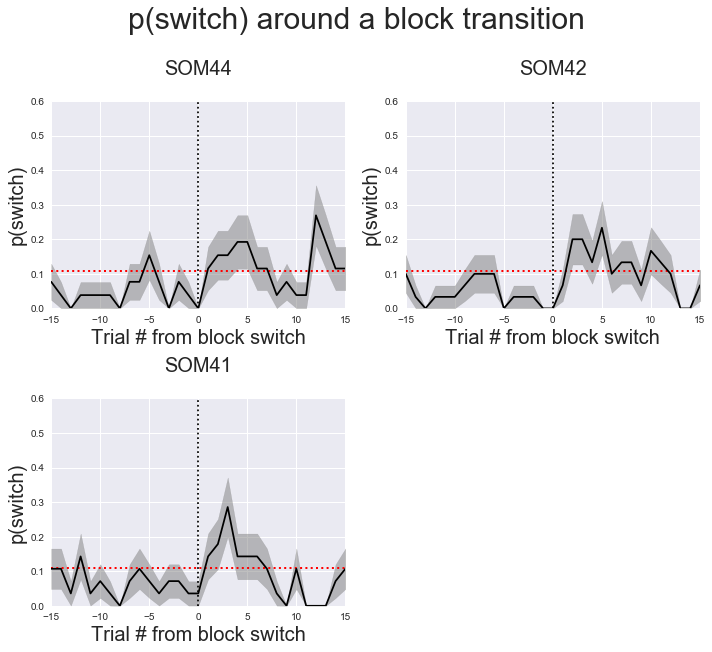

In [24]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(switch) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Switch'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=0.6,color='black',linestyle='dotted')
    plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block switch',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0],fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L)
    plt.ylim(0,0.6)
        
plt.tight_layout()

In [25]:
data_SOM42.shape, data_SOM44.shape, data_SOM45.shape, data_SOM41.shape

((2062, 54), (2023, 54), (3187, 54), (1991, 54))

## Look at Opto Stim trials

 code was modified to look at trials when laser was given.  paralaser is an array that looks at switches 15 trials before and 25 trials after a laser stim trial.  doesn not take into account any other trial params such as trial block number or if the trial was rewarded or not.
 
 

In [16]:
switch_laser = data[data['Laser'] == 1 ].index.values

L = 15
paralaser = np.zeros((switch_laser.shape[0],L*2))
paralaser_port = np.zeros_like(paralaser)

for i,point in enumerate(switch_laser):

    paralaser[i,:] = data.iloc[point-L:point+L]['Switch']
    paralaser_port[i,:] = data.iloc[point-L:point+L]['Higher p port']

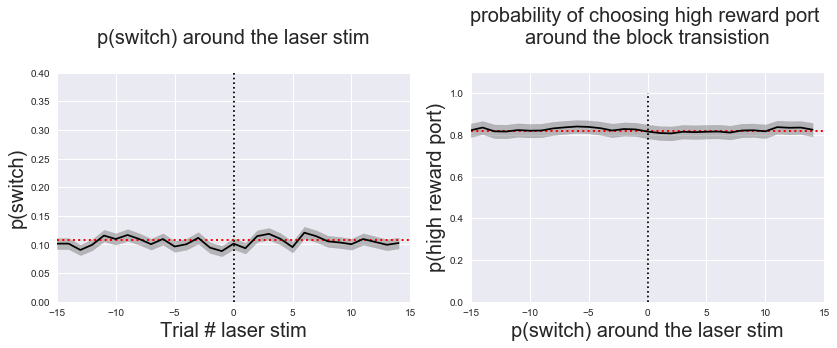

In [20]:
u = paralaser.mean(axis=0)
s = paralaser.std(axis=0)
SE = s/np.sqrt(paralaser.shape[0])
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the laser stim',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)


plt.subplot(122)
u = paralaser_port.mean(axis=0)
s = paralaser_port.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('p(switch) around the laser stim',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('probability of choosing high reward port \naround the block transistion',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,1.1)

plt.tight_layout()

## p(switch) around a laser stim in individual mice

In [31]:
mice = [data_SOM41, data_SOM42, data_SOM44, data_SOM45 ]

ValueError: could not broadcast input array from shape (32) into shape (40)

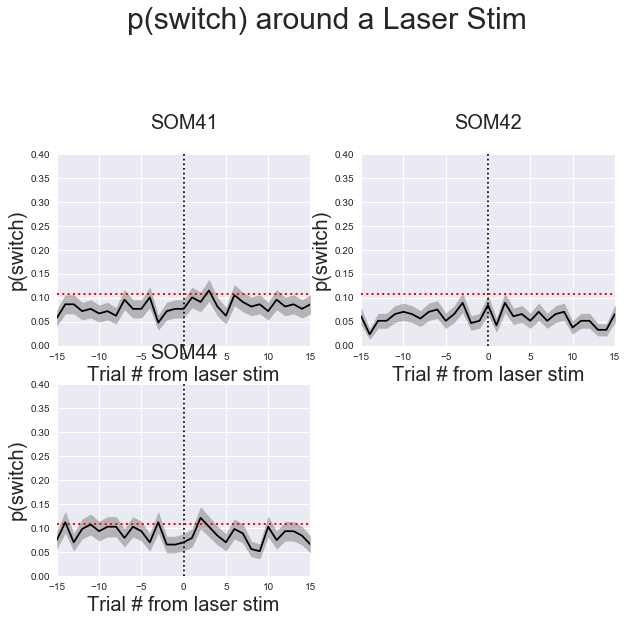

In [32]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(switch) around a Laser Stim',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_laser = mouse[mouse['Laser'] == 1 ].index.values

    L = 15
    paralaser = np.zeros((switch_laser.shape[0],L*2 + 10))
    paralaser_port = np.zeros_like(paralaser)

    for j,point in enumerate(switch_laser):

        paralaser[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paralaser_port[j,:] = data.iloc[point-L:point+L+10]['Switch'] 
        
    plt.subplot(3,2,i+1)
    u = paralaser_port.mean(axis=0)
    s = paralaser_port.std(axis=0)
    SE = s/np.sqrt(paralaser.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
    plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from laser stim',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0],fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L)
    plt.ylim(0,0.4)
        
plt.tight_layout()

In [30]:
 data_SOM42.shape, data_SOM44.shape, data_SOM45.shape, data_SOM41.shape

((2062, 54), (2023, 54), (3187, 54), (1991, 54))

## breakdown laser trials into those that were rewarded/unrewarded

In [22]:
switch_laser_rew = data[((data['Laser'] == 1) & (data['Reward'] == 1)) ].index.values

L = 15
paralaser_rew = np.zeros((switch_laser_rew.shape[0],L*2))

for i,point in enumerate(switch_laser_rew):

    paralaser_rew[i,:] = data.iloc[point-L:point+L]['Switch']

In [23]:
switch_laser_norew = data[((data['Laser'] == 1) & (data['Reward'] == 0)) ].index.values

paralaser_norew = np.zeros((switch_laser_norew.shape[0],L*2))

for j,point in enumerate(switch_laser_norew): 
    
    paralaser_norew[j,:] = data.iloc[point-L:point+L]['Switch']

In [24]:
paralaser_norew.shape, paralaser_rew.shape, data.shape

((264, 30), (731, 30), (9858, 54))

In [86]:
switch_laser_rew[729]

9833

In [83]:
df = pd.DataFrame(paralaser_rew)

In [84]:
df.to_csv(path_or_buf='/Users/Sabatini Lab/GitHub/mouse_bandit/paralaser_rew.csv')

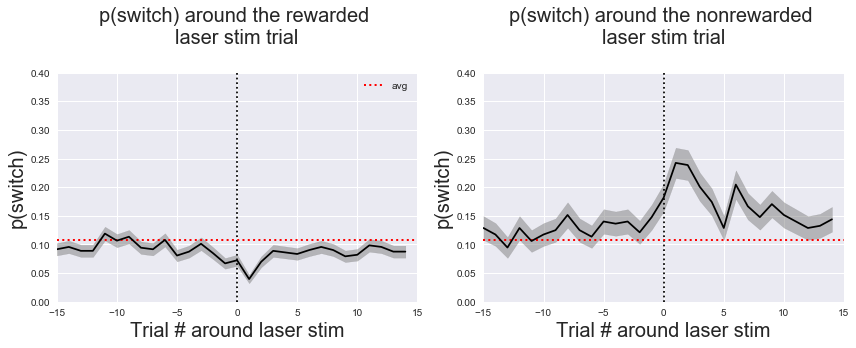

In [32]:
u = paralaser_rew.mean(axis=0)
s = paralaser_rew.std(axis=0)
SE = s/np.sqrt(paralaser_rew.shape[0])
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Trial # around laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)


plt.subplot(122)
u = paralaser_norew.mean(axis=0)
s = paralaser_norew.std(axis=0)
SE = s/np.sqrt(switch_laser_norew.shape[0])
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # around laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the nonrewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.tight_layout()

## Control vs Sst comparisons (work in progress)

In [90]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']
#data_PV30 = data[data['Mouse ID'] == 'PV30']

add = [data_SOM44, data_SOM45]

control = pd.concat(add)


#for c in np.unique(data['Session ID'].values):
    #control.append(data_PV30[data_PV30['Session ID'] == c])
    #control.append(data_SOM42[data_SOM42['Session ID'] == c])
 #   control.append(data_SOM44[data_SOM44['Session ID'] == c])
  #  control.append(data_SOM45[data_SOM45['Session ID'] == c])
    #control.append(data_SOM41[data_SOM41['Session ID'] == c])

In [98]:
switch_laser_rew1 = control[((control['Laser'] == 1) & (control['Reward'] == 1)) ].index.values

L = 15
paralaser_rew1 = np.zeros((switch_laser_rew1.shape[0],L*2))

for k,point in enumerate(switch_laser_rew1):

    paralaser_rew1[k,:] = control.iloc[point-L:point+L]['Switch']

ValueError: could not broadcast input array from shape (28) into shape (30)

In [61]:
#paralaser_rew1 not filled with values from row 70 to end.   Problem with enumerate???? 

In [63]:
paralaser_rew1.shape

(354, 10)

In [95]:
#df = pd.DataFrame(paralaser_rew1)

In [96]:
#df.to_csv(path_or_buf='/Users/Sabatini Lab/GitHub/mouse_bandit/paralaser_rew1_t.csv')

In [39]:
#control.to_csv(path_or_buf='/Users/Sabatini Lab/GitHub/mouse_bandit/control.csv')

In [50]:
switch_laser_norew1 = control[((control['Laser'] == 1) & (control['Reward'] == 0)) ].index.values

paralaser_norew1 = np.zeros((switch_laser_norew1.shape[0],L*2))

for j,point in enumerate(switch_laser_norew1):    
    paralaser_norew1[j,:] = control.iloc[point-L:point+L]['Switch']

ValueError: could not broadcast input array from shape (0) into shape (30)

In [51]:
paralaser_norew1.shape

(151, 30)

In [ ]:
#paralaser_norew1 not filled with values following row 27

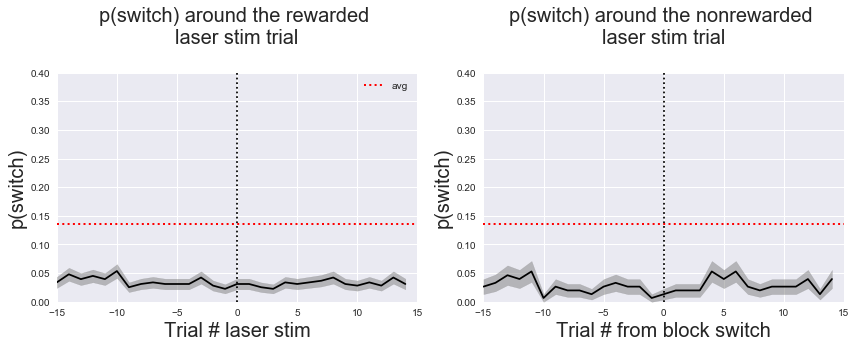

In [99]:
u = paralaser_rew1.mean(axis=0)
s = paralaser_rew1.std(axis=0)
SE = s/np.sqrt(paralaser_rew1.shape[0])
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)


plt.subplot(122)
u = paralaser_norew1.mean(axis=0)
s = paralaser_norew1.std(axis=0)
SE = s/np.sqrt(switch_laser_norew1.shape[0])
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(control['Switch'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the nonrewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.tight_layout()

In [55]:
add1 = [data_SOM41, data_SOM42]
sst = pd.concat(add1)

In [56]:
switch_laser_rew2 = sst[((sst['Laser'] == 1) & (sst['Reward'] == 1)) ].index.values

L = 15
paralaser_rew2 = np.zeros((switch_laser_rew2.shape[0],L*2))

for i,point in enumerate(switch_laser_rew2):

    paralaser_rew2[i,:] = sst.iloc[point-L:point+L]['Switch']

ValueError: could not broadcast input array from shape (0) into shape (30)

In [57]:
paralaser_rew2.shape

(320, 30)

In [58]:
switch_laser_norew2 = sst[((sst['Laser'] == 1) & (sst['Reward'] == 0)) ].index.values

paralaser_norew2 = np.zeros((switch_laser_norew2.shape[0],L*2))

for j,point in enumerate(switch_laser_norew2):    
    paralaser_norew2[j,:] = sst.iloc[point-L:point+L]['Switch']

ValueError: could not broadcast input array from shape (0) into shape (30)

In [59]:
paralaser_norew2.shape

(102, 30)

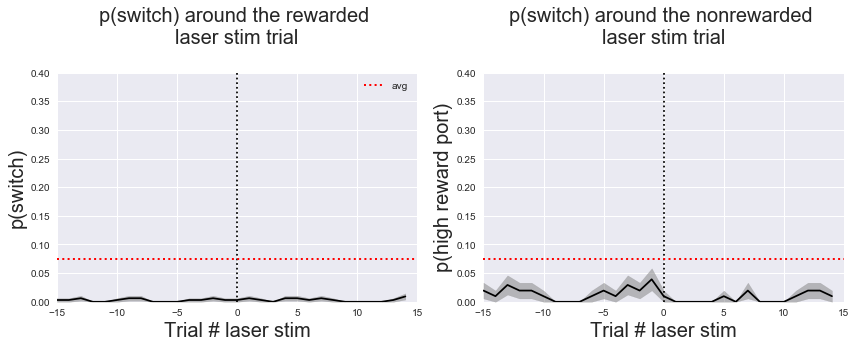

In [60]:
u = paralaser_rew2.mean(axis=0)
s = paralaser_rew2.std(axis=0)
SE = s/np.sqrt(paralaser_rew2.shape[0])
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(sst['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)


plt.subplot(122)
u = paralaser_norew2.mean(axis=0)
s = paralaser_norew2.std(axis=0)
SE = s/np.sqrt(switch_laser_norew2.shape[0])
plt.plot(np.arange(-1*L,L),u,color='black')
plt.fill_between(np.arange(-1*L,L),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
plt.hlines(sst['Switch'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('p(switch) around the nonrewarded \nlaser stim trial',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.4)

plt.tight_layout()

## Reward only

In [100]:
switch_r = data[data['Reward'] == 0 ].index.values

L = 15
paralaser_r = np.zeros((switch_r.shape[0],L*2 + 10))

for i,point in enumerate(switch_r):

    paralaser_r[i,:] = data.iloc[point-L:point+L+10]['Switch']

ValueError: could not broadcast input array from shape (0) into shape (40)

In [102]:
switch_r.shape

(2442,)

In [72]:
paralaser_r.shape

(2442, 40)

In [138]:
paralaser_r.mean()

0.0

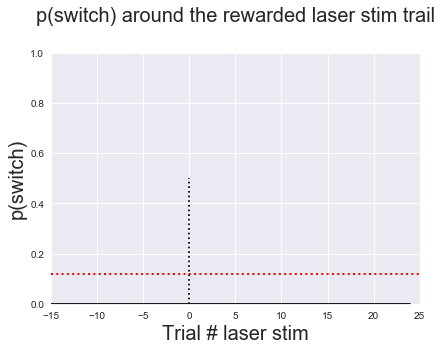

In [135]:
u = paralaser_r.mean(axis=0)
s = paralaser_r.std(axis=0)
SE = s/np.sqrt(paralaser_r.shape[0])
plt.figure(figsize=(12,5))


plt.subplot(121)
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # laser stim',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the rewarded laser stim trail',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L+10)
plt.ylim(0,1)


#plt.subplot(122)
#u = paraswitch_port.mean(axis=0)
#s = paraswitch_port.std(axis=0)
#SE = s/np.sqrt(paraswitch.shape[0])
#plt.plot(np.arange(-1*L,L+10),u,color='black')
#plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
#plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
#plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
#plt.xlabel('Trial # from block switch',fontsize=20)
#plt.ylabel('p(high reward port)',fontsize=20)
#plt.title('probability of choosing high reward port \naround the block transistion',fontsize=20,x=0.5,y=1.1)
#plt.xlim(-1*L,L+10)
#plt.ylim(0,1.1)

plt.tight_layout()

## END

little note on the for loop below. 

took me little while because I had the order of the else-if statements wrong. 

when block_trial == 0 needs to come BEFORE whether the block trial incremented by 1 or not (which is my hokey way of detecting when a new session started where block_trial does not equal 0. 

I suppose a better way would be to detect when the block trial is 11 AND the previous block trial != 10. that would work. okay. switched it to that now. 

In [34]:
block_reward = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    trial = data.iloc[i]
    
    #lets deal with weird cases first:
    #1) the first row
    if(i == 0):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    
    #3) the first trial of a new block
    elif (trial['Block Trial'] == 0):
        block_reward[i] = 0
    
    #2) the first trial of a new session
    elif (((trial['Block Trial'] - trial_prev['Block Trial']) != 1) and (trial['Block Trial'] == 11)):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    else:
        block_reward[i] = block_reward[i-1] + trial['Reward']
    
    trial_prev = trial

In [35]:
reward_switches = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterR = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterNoR = np.zeros(np.unique(block_reward).shape[0])
for i,r_block in enumerate(np.unique(block_reward)):
    reward_switches[i] = data[block_reward == r_block]['Switch'].mean()
    reward_switches_afterR[i] = data[((block_reward == r_block) & (data['1_Reward']==1))]['Switch'].mean()
    reward_switches_afterNoR[i] = data[((block_reward == r_block) & (data['1_Reward']==0))]['Switch'].mean()

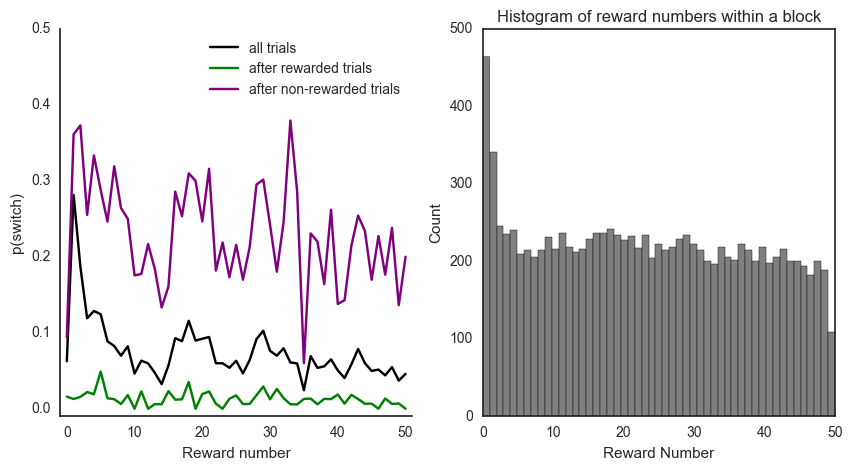

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.unique(block_reward),reward_switches,color='black',label='all trials')
plt.plot(np.unique(block_reward),reward_switches_afterR,color='green',label='after rewarded trials')
plt.plot(np.unique(block_reward),reward_switches_afterNoR,color='purple',label='after non-rewarded trials')
plt.xlabel('Reward number')
plt.ylabel('p(switch)')
plt.legend(loc='upper right')
plt.xlim(-1,51)
plt.ylim(-0.01,0.5)
sns.despine()

plt.subplot(122)
plt.hist(block_reward,bins=51,color='grey')
plt.title('Histogram of reward numbers within a block')
plt.xlabel('Reward Number')
plt.ylabel('Count')